In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

%matplotlib inline

## EXPLORING DATA

In [2]:
data=load_boston()
X,y =load_boston(return_X_y=True)

In [3]:
X_df = pd.DataFrame(X,y)
X_df.columns = list(data.feature_names)
X_df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
19.7,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
18.3,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
21.2,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
17.5,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
16.8,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [4]:
X_df.rename_axis(index="median value")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
median value,,,,,,,,,,,,,
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64


In [5]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 506 entries, 24.0 to 11.9
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 55.3 KB


In [6]:
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
## Modify data presentation 
# set a new index and the target column

X_df['target: Median Value'] = X_df.index
s = pd.Series(list(range(X_df.shape[0])))
X_df.set_index(s)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target: Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
## Check the correlation between features
features_corr = X_df.corr()
features_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target: Median Value
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
## WE can notice that the LSTAT and RM features are very correlated with the target

## Data visualization

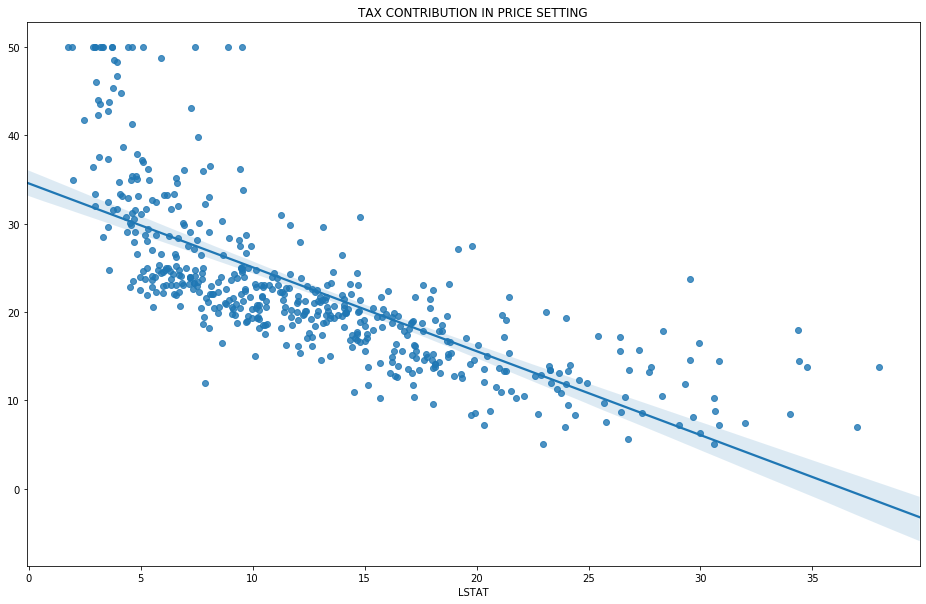

In [10]:
plt.figure(figsize=(16,10))
plt.title('TAX CONTRIBUTION IN PRICE SETTING')
sns.regplot(x=X_df['LSTAT'],y=data.target,label='TAX')
#sns.lineplot(x=X_df['TAX'],y=data.target,label='DIS')

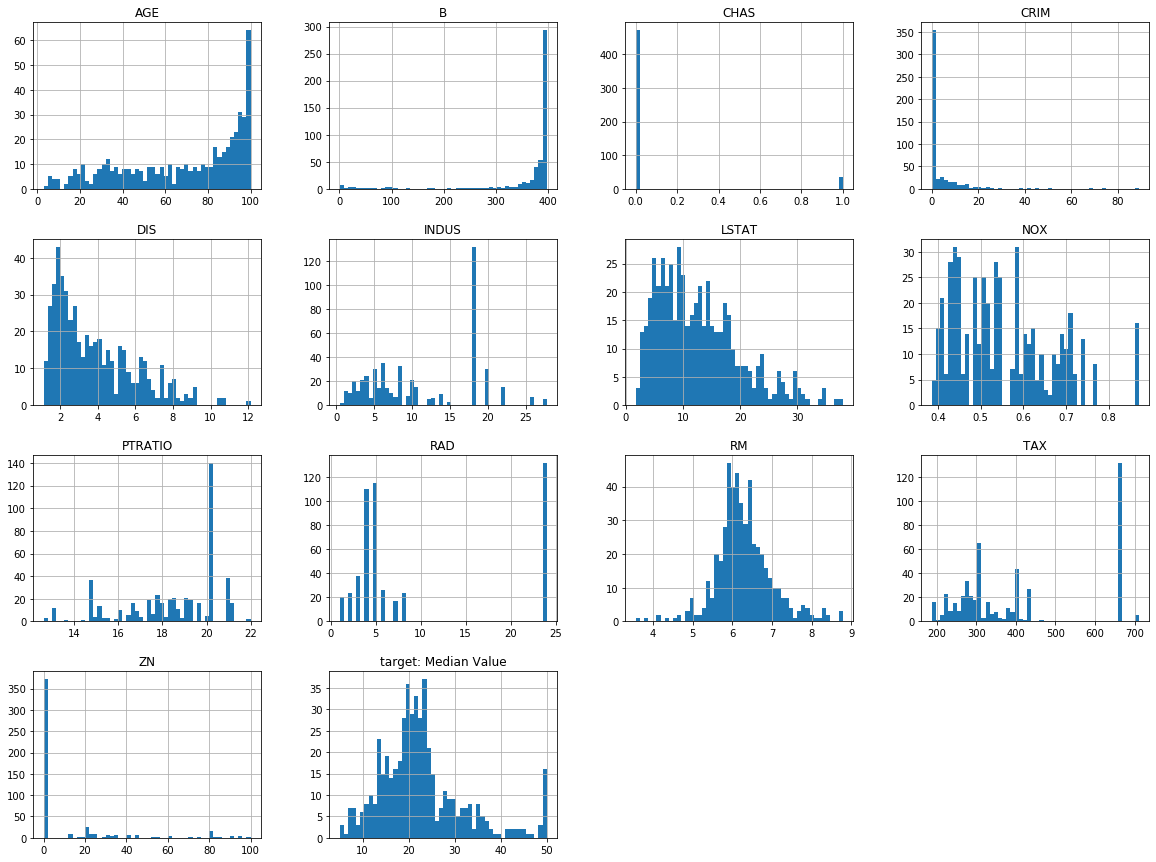

In [11]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
## Replace the NaN values by the median value of features

#for c in (X_df.columns):
#    median = X_df[c].median()
#    X_df[c].fillna(median, inplace=True) # option 3

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")
X = imputer.fit(X_df)
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

## MODEL CONSTRUCTION USING SKLEARN

In [518]:
# split data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X_df,y, test_size=0.3, random_state=42)

In [541]:
# fit data
line_reg = LinearRegression(fit_intercept=True)
model = line_reg.fit(np.array(x_train['TAX']).reshape(-1,1),y_train)

## print the found coef 
model.coef_

array([-0.02550129])

/home/cilia/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


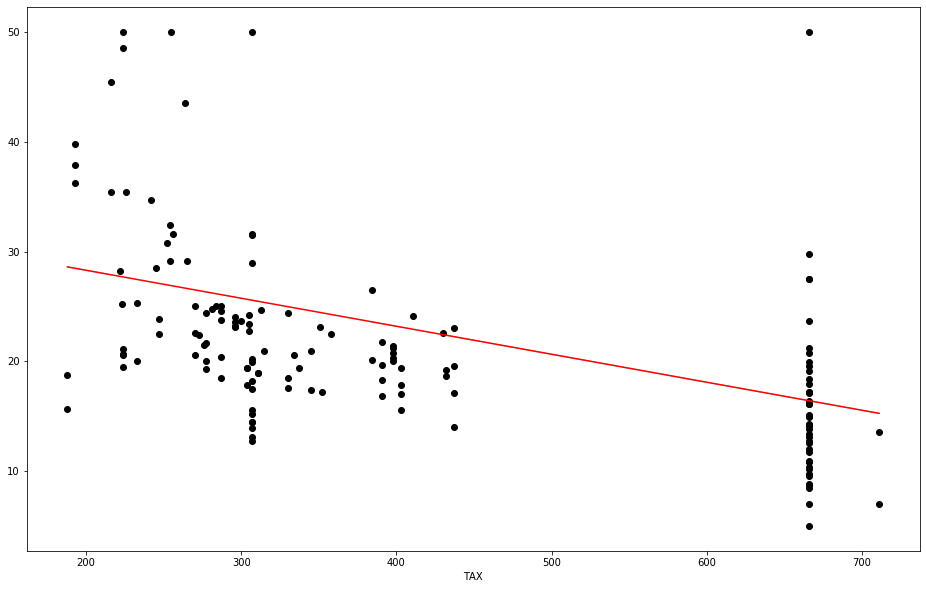

In [567]:
y_pred = model.predict(np.array(x_test['TAX']).reshape(-1,1))

# Plot outputs
plt.figure(figsize=(16,10))
plt.scatter(x_test['TAX'], y_test, color='black')
sns.lineplot(x=x_test['TAX'], y=y_pred, color='RED')
plt.show()

In [549]:
# make prediction for a given tax
tax = [[391.3]]
price_predict = model.predict(tax)

print("The predicted price is: {}".format(float((price_predict))))

The predicted price is: 23.417270052101227


In [568]:
## multiple features
line_reg_mul = LinearRegression(fit_intercept=True)
model2 = line_reg.fit(x_train,y_train)

y_pred = model2.predict(x_test)
print('Mean squared error: %.2f \n' % mean_squared_error(y_test, y_pred))

## print the found coefs
print(model2.coef_)


Mean squared error: 21.52 

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


## HARD CODED LINEAR REGRESSION MODEL WITH ONE VARIABLE  

In [487]:
## initialize coefficients 
W = np.zeros((2,1))
m = x_train['TAX'].shape[0]

## add a column to the design matrix X
x_train = pd.DataFrame(x_train['TAX'])
intercept_col = np.ones((m,1))
x_train['intercept_col'] = intercept_col

## gradient descent settings
iterations = 1500;
alpha = 0.1;

x_train=x_train.transpose() 
x_train.head()

,28.7,21.2,19.3,23.1,19.1,25.0,33.4,5.0,29.6,18.7,...,20.3,11.9,13.6,29.8,21.7,19.5,21.1,24.5,13.4,18.6
TAX,222.0,432.0,233.0,307.0,666.0,666.0,222.0,666.0,193.0,284.0,...,188.0,273.0,307.0,398.0,305.0,384.0,223.0,280.0,666.0,384.0
intercept_col,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [488]:
x_train = np.array([x_train.iloc[ 0 , : ],x_train.iloc[ 1 , : ]])

### helper funtions

In [489]:
def compute_cost(X,y,W):
    
    m = X.shape[1]
    h_y = np.dot(np.transpose(W), X) - y.reshape(1,-1)
    J = (1/2*m) * np.dot(np.power(h_y, 2), np.ones((m,1)))
    
    return J

In [490]:
def gradientDescent(X,y,W,iterations,alpha):
    
    m = x_train.shape[1]
    costs = np.zeros((iterations,1))
    for i in range(iterations):
        
        ## Perform a single gradient step using the whole batch: Batch gradient descent 
        tmp1 = W[0] - alpha*(1/m)*np.dot((np.dot(np.transpose(W),X) - np.transpose(y)),X[0].reshape(-1,1))
        tmp2 = W[1] - alpha*(1/m)*np.dot((np.dot(np.transpose(W),X) - np.transpose(y)),X[1].reshape(-1,1))
        
        ## Update params 
        W[0]= tmp1
        W[1]= tmp2
        
        ## Calculate the new cost using the params 
        cost = compute_cost(X,y,W)
        print(cost)
        
        ## Save the cost of every iteration 
        costs[i] = cost
        
    return W,costs

### Runing gradient descent 

In [491]:
W,costs = gradientDescent(x_train,y_train,W,iterations,alpha)

[[9.09096845e+15]]
[[3.39773272e+24]]
[[1.26989635e+33]]
[[4.74621425e+41]]
[[1.77388884e+50]]
[[6.6298769e+58]]
[[2.47790429e+67]]
[[9.2611217e+75]]
[[3.46132719e+84]]
[[1.29366467e+93]]
[[4.83504789e+101]]
[[1.80709025e+110]]
[[6.75396656e+118]]
[[2.52428257e+127]]
[[9.43445967e+135]]
[[3.52611194e+144]]
[[1.31787785e+153]]
[[4.92554421e+161]]
[[1.84091308e+170]]
[[6.88037878e+178]]
[[2.57152891e+187]]
[[9.61104197e+195]]
[[3.59210925e+204]]
[[1.34254422e+213]]
[[5.01773432e+221]]
[[1.87536897e+230]]
[[7.00915701e+238]]
[[2.61965954e+247]]
[[9.79092931e+255]]
[[3.65934181e+264]]
[[1.36767227e+273]]
[[5.11164993e+281]]
[[1.91046976e+290]]
[[7.14034556e+298]]
[[2.66869101e+307]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[nan]]
[[nan]]


/home/cilia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/home/cilia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
[[nan]]
